# HomeWork 3 

Arshak Parsa

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Problem 1

## Part A

In [100]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In [101]:
n, p = (y.shape[0], 2)
print(f"n = {n}, p = {p}")

n = 100, p = 2


The equation of the model is

$$ y_i = x_i - 2 x_i^2 + \epsilon_i $$

## Part B

Text(0, 0.5, 'y')

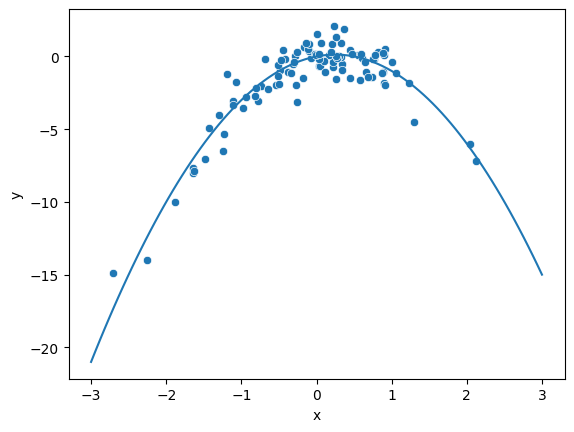

In [102]:
x_gen = np.linspace(-3, 3, 100)
y_gen = x_gen - 2 * x_gen**2

sns.scatterplot(x = x,y = y)
plt.plot(x_gen, y_gen)
plt.xlabel('x')
plt.ylabel('y')

As you can see there is a quadratic pattern as we expected!

## Part C

In [103]:
x.reshape(-1, 1).shape

(100, 1)

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut, cross_validate,KFold
from sklearn.preprocessing import PolynomialFeatures

def do_cv(seed,fold):
    for i in range(1,5):
        model = Pipeline([
        ('preprocessor', PolynomialFeatures(degree = i, include_bias=False)),
        ('regressor', LinearRegression())
        ])
        scores_cv = cross_validate(model,x.reshape(-1, 1),y, cv = KFold(n_splits=fold, random_state=seed, shuffle=True), scoring = 'neg_mean_squared_error')
        model.fit(x.reshape(-1,1),y)
        #print(f'Model coefs are {model['regressor'].coef_}')
        print(f'MSE for polynomial of degree {i} is ',-scores_cv['test_score'].mean())
do_cv(40,100)

MSE for polynomial of degree 1 is  6.633029839181984
MSE for polynomial of degree 2 is  1.1229368563419673
MSE for polynomial of degree 3 is  1.3017965489358867
MSE for polynomial of degree 4 is  1.3323942694179312


There is also another way of doing this :

We might generate different data with each seed, the results of this method is also going to be a little close (not exactly the same but close)

In [105]:
def do_cv_method2(seed,fold):
    rng = np.random.default_rng(seed)
    x = rng.normal(size=100)
    y = x - 2 * x**2 + rng.normal(size=100)
    for i in range(1,5):
        model = Pipeline([
        ('preprocessor', PolynomialFeatures(degree = i, include_bias=False)),
        ('regressor', LinearRegression())
        ])
        scores_cv = cross_validate(model,x.reshape(-1, 1),y, cv = KFold(n_splits=fold, random_state=seed, shuffle=True), scoring = 'neg_mean_squared_error')
        model.fit(x.reshape(-1,1),y)
        #print(f'Model coefs are {model['regressor'].coef_}')
        print(f'MSE for polynomial of degree {i} is ',-scores_cv['test_score'].mean())
do_cv_method2(40,100)

MSE for polynomial of degree 1 is  8.620622025630917
MSE for polynomial of degree 2 is  1.134899257731854
MSE for polynomial of degree 3 is  1.1598970602387957
MSE for polynomial of degree 4 is  1.1859196813074646


## Part D

In [106]:
do_cv(45,100)

MSE for polynomial of degree 1 is  6.633029839181983
MSE for polynomial of degree 2 is  1.1229368563419673
MSE for polynomial of degree 3 is  1.3017965489358858
MSE for polynomial of degree 4 is  1.3323942694179314


The results are the same because `random_state` does not affect `LeaveOneOut` cross validation.

`KFold` results will not change as long as `n_splits` = number of samples.   

In [107]:
do_cv_method2(45,100)

MSE for polynomial of degree 1 is  5.911341472247167
MSE for polynomial of degree 2 is  1.1292328429144853
MSE for polynomial of degree 3 is  1.1445470935539421
MSE for polynomial of degree 4 is  1.1602329936832703


It's not very close but still it recommends that the quadratic is the best model.

Note: In LOOCV the correlation between training sets in each iteration is high, and hence LOOCV has a higher variance, see [this](https://stats.stackexchange.com/questions/178388/high-variance-of-leave-one-out-cross-validation).

## Part E

The score of quadratic polynomial is the smallest as we expected.

## Part F

Let's perform a 10-fold cross validation 

In [108]:
print(f'seed = {40}')
do_cv(40,10)
print(f'seed = {45}')
do_cv(45,10)

seed = 40
MSE for polynomial of degree 1 is  7.476045289654008
MSE for polynomial of degree 2 is  1.1034181166550563
MSE for polynomial of degree 3 is  1.243314398957978
MSE for polynomial of degree 4 is  1.2348290729794278
seed = 45
MSE for polynomial of degree 1 is  6.409493604094116
MSE for polynomial of degree 2 is  1.146570177867225
MSE for polynomial of degree 3 is  1.3158477866532512
MSE for polynomial of degree 4 is  1.2715194792846904


## Part G

In [109]:
for i in range(1,5):
    model = Pipeline([
    ('preprocessor', PolynomialFeatures(degree = i, include_bias=False)),
    ('regressor', LinearRegression())
    ])
    model.fit(x.reshape(-1,1),y)
    print(f'Model coefs are {model['regressor'].coef_} with intercept of {round(model['regressor'].intercept_,3)}')

Model coefs are [1.94936857] with intercept of -1.465
Model coefs are [ 0.96627276 -2.00470902] with intercept of -0.073
Model coefs are [ 1.1145842  -2.04709357 -0.06430033] with intercept of -0.057
Model coefs are [ 0.90499786 -2.50592308  0.03376837  0.10421699] with intercept of 0.101


In [110]:
import statsmodels.api as sm
for i in range(1,5):
    result = sm.OLS(y,  PolynomialFeatures(degree = i).fit_transform(x.reshape(-1,1))).fit()
    print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Mon, 22 Dec 2025   Prob (F-statistic):           1.04e-09
Time:                        12:52:00   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0.247     -5.937      0.0

The p-values are showing that the $X^2$ and $X$ coefficients are significant.

# Problem 2

In [111]:
from ISLP import load_data
Boston = load_data('Boston')

## Part A

In [112]:
μ_hat = Boston['medv'].mean()
μ_hat

np.float64(22.532806324110677)

## Part B

$$ SE(\hat{\mu}) = \sqrt{Var(\hat{\mu})} = \sqrt{\frac{\sigma^2}{n}} = \frac{\sigma}{\sqrt{n}} $$

In [113]:
se = Boston['medv'].std()/(Boston['medv'].shape[0]**0.5)
se

np.float64(0.40886114749753505)

## Part C

Here is a library implementation

In [114]:
rng = np.random.default_rng(1)
res = stats.bootstrap(np.array([Boston['medv']]), np.mean, rng = np.random.default_rng(1), n_resamples=2000).bootstrap_distribution
print(f'The estimate for mean is {res.mean()}')
res

The estimate for mean is 22.53547312252964


array([22.6270751 , 22.57272727, 22.56225296, ..., 22.55316206,
       21.94229249, 22.91798419], shape=(2000,))

Here is a manual implementation

In [115]:
def manual_bootstrap(v, f, rng, n_samples):
    res = []
    for i in range(n_samples):
        res.append(f(rng.choice(v, size=len(v), replace = True, )))
    return np.array(res)

res = manual_bootstrap(Boston['medv'], np.mean, np.random.default_rng(1), 2000)
print(f'The estimate for mean is {res.mean()}')
res

The estimate for mean is 22.53547312252964


array([22.6270751 , 22.57272727, 22.56225296, ..., 22.55316206,
       21.94229249, 22.91798419], shape=(2000,))

## Part D

In [116]:
print(np.quantile(res, 0.025),np.quantile(res, 0.975))
print(μ_hat - 2*se,μ_hat + 2*se)

21.71479249011858 23.33606719367589
21.715084029115605 23.35052861910575


## Part E

In [117]:
stats.bootstrap(np.array([Boston['medv']]), np.median, rng = np.random.default_rng(1), n_resamples=2000).standard_error

np.float64(0.3841607309884973)

How is it calculated?

In [118]:
stats.bootstrap(np.array([Boston['medv']]), np.median, rng = np.random.default_rng(1), n_resamples=2000).bootstrap_distribution.std(ddof = 1)

np.float64(0.3841607309884973)

## Part F

In [119]:
μ_0_1 = stats.bootstrap(np.array([Boston['medv']]), lambda x : np.percentile(x,10), rng = np.random.default_rng(1), n_resamples=2000).bootstrap_distribution.mean()

In [120]:
np.percentile(Boston['medv'],10)

np.float64(12.75)

## Part G

In [121]:
stats.bootstrap(np.array([Boston['medv']]), lambda x : np.percentile(x,10), rng = np.random.default_rng(1), n_resamples=2000).standard_error

np.float64(0.5068167238714582)

# Problem 3

## Part A

## Part B

## Part C

## Part D

## Part E

## Part F

## Part G

# Problem 4

## Part A

## Part B

## Part C

## Part D

## Part E

## Part F

## Part G

# Problem 5

## Part A

## Part B

## Part C

## Part D

## Part E

## Part F

## Part G

# Problem 6

## Part A

## Part B

## Part C

## Part D

## Part E

## Part F

## Part G